#Multi-class classification task using least squares #

Our goal is to solve a classification task using the least squares algorithm. Although , for problems with multiple classes there are better and more efficient machine learning algorithms , the ultimate goal is to show a deep understanding of this algorithmic method as well as unconventional thinking.

We chose the IRIS dataset . Although the dataset is quite small in size , the 3 classes of examples as well as the few properties of each example make it ideal to solve such a problem , without at the same time creating a computational power issue.




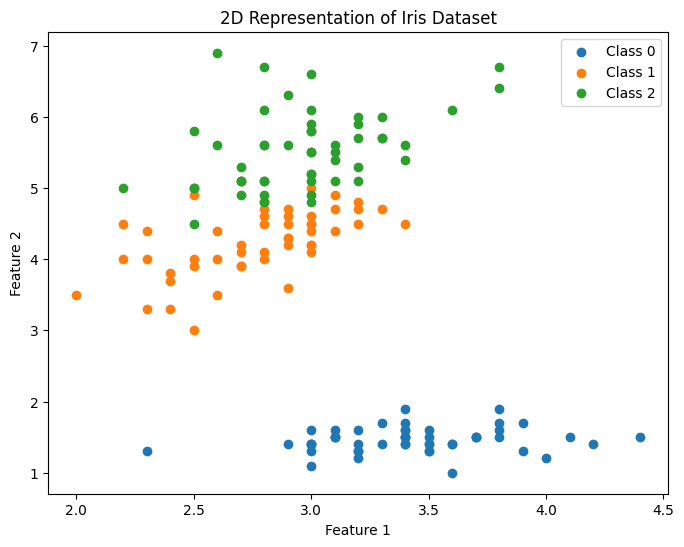

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, accuracy_score


# We load the iris dataset using sklearn datasets
# the ML libraries were used only for train/test splits , loading the datasets
# and metrics
iris = load_iris()
X = iris.data
y = iris.target


plt.figure(figsize=(8, 6))

for label in range(3):
    X_label = X[y == label]
    plt.scatter(X_label[:, 1], X_label[:, 2], label=f"Class {label}")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Representation of Iris Dataset")
plt.legend()
plt.show()

#**Train-Test split**

At this point we split the data to train and test using train_test_split provided by sklearn.We've set the train set's size to 20% of the whole data so we expect 30 test examples and 120 train.First we store the number of our examples to the $m$ variable in order to use it during our training.

Before we proceed with the split , we add a new column of ones at the beginning of every example, that is going to be multiplied by $w_0$, when we train our models.



In [ ]:
#m=X.shape[0]
#X = np.hstack([np.ones((m, 1)), X])

#Spliting the data using sklearn's train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis= 0)
X_train = (X_train - X_train_mean) / X_train_std

X_test = (X_test - X_train_mean) / X_train_std

X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])



#Printing the shapes to see that everything run as expected
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (120, 5)
X_test shape: (30, 5)
y_train shape: (120,)
y_test shape: (30,)


#Creating the cost computation function

We are using least squares.The formula for calculating the mean squared error is:


$$J(w) = \frac{1}{2 m} \sum_{i=1}^{m} ( h_{w}( x^{(i)} ) - y^{(i)} )^{2}$$


Which into developer's language translates into the following block of code.

In [ ]:
def computeCost(X,Y, weights):
  m=X.shape[0]
  J=0
  J=(1/(2.0*m))*np.sum(((np.dot(X,weights)-Y)**2))
  return J

#Optimization#

We want to optimize our line with gradient descent. The derivative of the cost function with respect to the weights is :

$$\nabla\ J(w)=  \frac{1}{ m}\sum_{i=1}^{m} ( h_{w}( x^{(i)} ) - y^{(i)} ) x^{(i)}_{j}$$

So the update of our parameters is going to be done with the following rule:

$$w_{j} = w_{j} - a \frac{1}{m} \sum_{i=1}^{m} ( h_{w}( x^{(i)} ) - y^{(i)} ) x^{(i)}_{j}$$

Which in code translates as followed:



In [ ]:
def optimize(X, y, weights, alpha, num_iters):
    m, n = X.shape
    J_history = np.zeros((num_iters, 1))
    y_modified = np.where(y == label, 1, 0)

    for which_iter in range(num_iters):
        error = np.dot(X, weights) - y
        weights = weights - (alpha / m) * np.dot(X.T, error)
        J_history[which_iter] = computeCost(X, y, weights)

    return J_history, weights


#Training

As we previously disscused , linear regression isn't the best choice for classification tasks. The idea we implemented is that we can train 3 seperate classifiers (one for every class) and for every new example, to predict it's class based on the argmax of the three classifiers.

The idea behind this implementation , is to mark the class label as 1 for the corresponding classifier , and 0 for every other class. Thus we expect , that every linear model would "learn" to give values close to 1 to the examples of it's corresponding class , and values close to 0 for other classes.



Metrics on the Train Set:

Train Accuracy: 0.8416666666666667
Train F1: 0.841295050331195
Train recall: 0.8416666666666667

Metrics on the Test Set:

Test Accuracy: 0.8666666666666667
Test F1-score: 0.8638888888888888
Test Recall: 0.8666666666666667


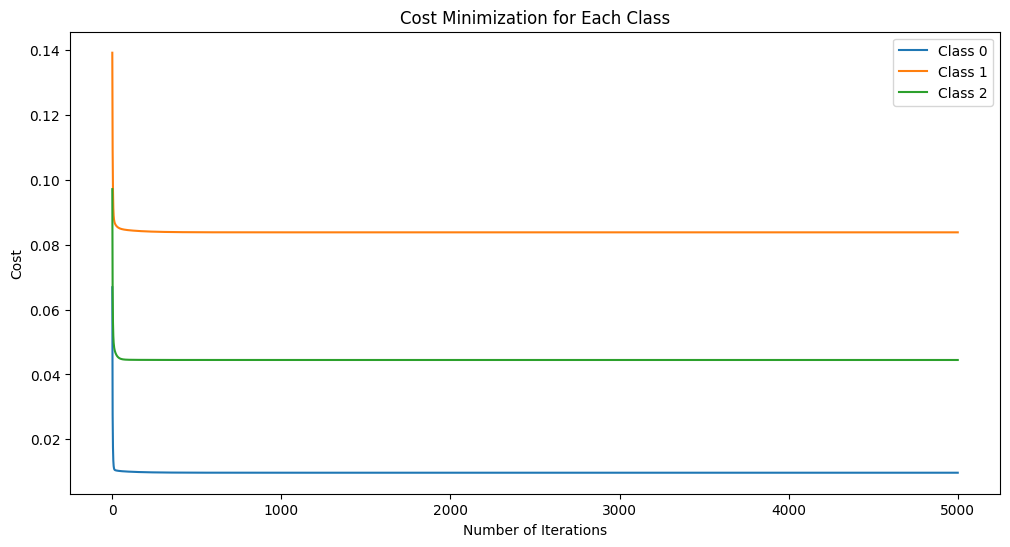

In [ ]:

models = []
J_history_list = []

#We start the training , we train three seperate models.
for label in range(3):
    # We modify the current's class label , to be 1 for every example
    # that belongs to the class , and 0 for every other.
    y_modified = np.where(y_train == label, 1, 0)

    #We initiliaze the weights for every model with zeros.

    weights = np.zeros(X_train.shape[1])

    # We train each model using 0.2 as learning rate , and 5000 iterations
    # after experimentation we saw that we do not gain anything after 5000 iterations
    J_history, trained_model = optimize(X_train, y_modified, weights, alpha=0.2, num_iters=5000)

    # We store the model for every class
    models.append(trained_model)
    J_history_list.append(J_history)


# We predict the class using the argmax of all the models for the train , and the
# test set and we print the metrics
tr_predictions = np.argmax(np.array([np.dot(X_train, weights) for weights in models]), axis=0)
tr_accuracy = accuracy_score(y_train, tr_predictions)
tr_f1 = f1_score(y_train, tr_predictions,average='weighted')
tr_recall = recall_score(y_train, tr_predictions,average='weighted')


print("\nMetrics on the Train Set:\n")
print("Train Accuracy:", tr_accuracy)
print("Train F1:",tr_f1)
print("Train recall:",tr_recall)

ts_predictions = np.argmax(np.array([np.dot(X_test, weights) for weights in models]), axis=0)
ts_accuracy = accuracy_score(y_test, ts_predictions)
ts_f1 = f1_score(y_test, ts_predictions,average='weighted')
ts_recall = recall_score(y_test, ts_predictions,average='weighted')



print("\nMetrics on the Test Set:\n")
print("Test Accuracy:", ts_accuracy)
print("Test F1-score:",ts_f1)
print("Test Recall:",ts_recall)

# We print the cost function for every classifier to see what happened in each one
# of them
plt.figure(figsize=(12, 6))
for label, J_history in enumerate(J_history_list):
    plt.plot(range(1, len(J_history) + 1), J_history, label=f"Class {label}")

plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Cost Minimization for Each Class")
plt.legend()
plt.show()

#Calculation with the normal equation

In our example we have multiple targets , let

$x$=\begin{bmatrix}
    x_{1}^{T}, \\
    x_{2}^{T}, \\
    x_{3}^{T}, \\
    \vdots, \\
    x_{i}^{T}, \\
    x_{n}^{T}
\end{bmatrix}  

The (N,d)-matrix of the features , where ${x_i}(dxi)$ ,

$y$=\begin{bmatrix}
    y_{1}^{T}, \\
    y_{2}^{T}, \\
    y_{3}^{T}, \\
    \vdots, \\
    y_{i}^{T}, \\
    y_{n}^{T}
\end{bmatrix}
<br>
The $(N,t)$-targets matrix. And also ${W}$ the $(d,k)$-weights matrix of the model where $k$ represents the number of the classes.

$$P(Y|X,W)=\prod_{i=0}^{N} p(y_i \mid x_i, w)=\prod_{i=0}^{N} N(y_i \mid w^{T}x_i)$$

The Log likehood would be:

$$logP(Y|X,W)=\sum_{i=0}^{N} log N(y_i \mid w^{T}x_i,I)=$$
<br>
$$\sum_{i=0}^{N}log(\frac{1}{(2\pi)^{n/2}|I|^{1/2}})-\frac{1}{2}(y_i-w^{T}x_i)^{T}I(y_i-w^{T}x_i) =$$
<br>
$$-\frac{1}{2}\sum_{i=0}^{N}(y_i-w^{T}x_i)^{T}(y_i-w^{T}x_i)-\frac{t}{2}\sum_{i=0}^{N}log(2π).$$

So , we want to minimize the negative log likehood:

$$-logP(Y|X,W)=\frac{1}{2}\sum_{i=0}^{N}(y_i-w^{T}x_i)^{T}(y_i-w^{T}x_i)+const=$$
<br>
$$\frac{1}{2}\text{tr}\left(Y - XW)(Y - XW)^T\right.$$
<br>
If we derive the previous formula with respect to W and set it equal to zero, we come to the conlusion that we can calculate the optimal solution for our train set, with the following formula:
<br>
<br>
$$W = ( X^{T} X )^{-1} X^{T} Y$$

** We have used the following rules  :
<ul>
<li>$\text{tr}{X}=\text{tr}{X^{T}}$</li>
<li>$\frac{\partial \text{tr}(AMB)}{\partial M} = A^T B^T$</li>
<li>$\text{tr}(AB^T) = \text{tr}(B^TA)$</li>
</ul>
<br>
Below we calculate the weights with the closed formula , and compare it with the results of the gradient descent. As least squares is a convex function , we expect both to look more or less the same.

By adjusting the learning rate and the iterations we've reached the global minimum for our training data given to us by the closed form. Though , with a different learning rate we get a better accuracy in our test data.That is due to the fact that the global minimum for the training data doesn't automatically mean that it the best for the test data as well.

In [ ]:
Y_train = np.eye(np.max(y_train) + 1)[y_train]
Y_test = np.eye(np.max(y_test) + 1)[y_test]

We calculate the weights using the normal equation

In [ ]:
W = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train

And finally, we predict the classes for our train and test set.And we get the exact same result as with gradient descent.

In [ ]:
pred_train = np.dot(X_train, W)
is_correct_train = np.argmax(Y_train, axis=1) == np.argmax(pred_train, axis=1)
acc_train = np.sum(is_correct_train) / is_correct_train.shape[0]
acc_train

0.8416666666666667

In [ ]:
P_test = X_test @ W
is_correct_test = np.argmax(Y_test, axis=1) == np.argmax(P_test, axis=1)
acc_test = np.sum(is_correct_test) / is_correct_test.shape[0]
acc_test

0.8666666666666667

In [ ]:
print('Weights with normal equation: ')
print(W.T)
print('Weights with gradient descent: ')
for model in models:
  print(model)

Weights with normal equation: 
[[ 0.33333333  0.03764275  0.11736188 -0.37368922 -0.04461054]
 [ 0.34166667  0.02015154 -0.20798826  0.30254685 -0.32100917]
 [ 0.325      -0.05779429  0.09062637  0.07114237  0.36561971]]
Weights with gradient descent: 
[ 0.33333333  0.03764275  0.11736188 -0.37368922 -0.04461054]
[ 0.34166667  0.02015154 -0.20798826  0.30254685 -0.32100916]
[ 0.325      -0.05779429  0.09062637  0.07114237  0.36561971]


In [ ]:
from sklearn.metrics import classification_report

print('Model classification report on the train set: ')
print(classification_report(y_train,tr_predictions))

print('Model classification report on the test set: ')
print(classification_report(y_test,ts_predictions))

Model classification report on the train set: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.81      0.71      0.75        41
           2       0.73      0.82      0.77        39

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120

Model classification report on the test set: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      0.67      0.75         9
           2       0.77      0.91      0.83        11

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.86        30



#Explanation

We see that for every classifier , the error decreases. For class 0 the error grows extremely smaller in comparison with the other linear models. If we take a look to the representation of the data below , we can clearly see why this happens.

Class number 0 , is much more discrete than the other two in the 2D representation of the data. So intuitively , we expect our model to be able to distinguish between examples of class 0 and the others, much easier than the other two classifiers.

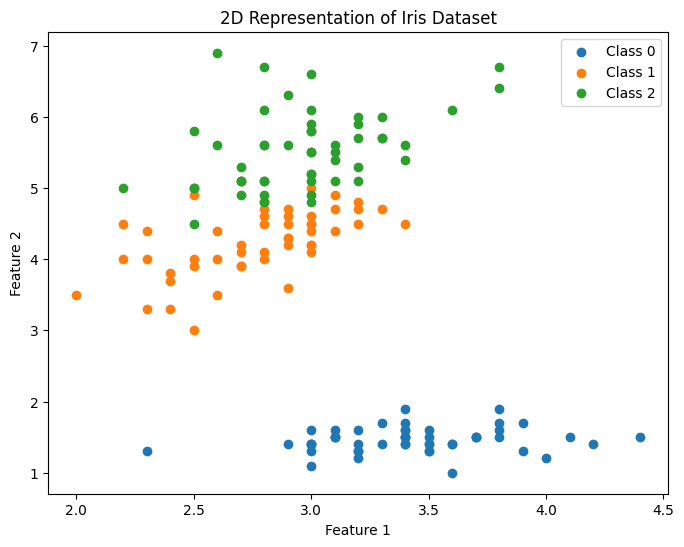

In [ ]:
plt.figure(figsize=(8, 6))

for label in range(3):
    X_label = X[y == label]
    plt.scatter(X_label[:, 1], X_label[:, 2], label=f"Class {label}")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Representation of Iris Dataset")
plt.legend()
plt.show()

#Implementation with Sklearn's LinearRegression#

Here , we used the same technique but instead of using our model , we used the ready-made Linear Regression algorithm from sklearn library. As we can see
the accuracy of sklearn model is similar to ours when we follow the same logic.
(Training 3 different classifiers , one for every class).

In [ ]:
from sklearn.linear_model import LinearRegression

sklearn_models=[LinearRegression() for _ in range(y_train.shape[0])]
for i,model in enumerate(sklearn_models):
  y_modified = np.where(y_train == i, 1, 0)
  model.fit(X_train,y_modified)

predictions = np.array([model.predict(X_test) for model in sklearn_models]).T

predicted_classes = np.argmax(predictions, axis=1)


sklearn_accuracy = accuracy_score(y_test, predicted_classes)
sklearn_f1 = f1_score(y_test, ts_predictions,average='weighted')
sklearn_recall = recall_score(y_test, ts_predictions,average='weighted')
print("\nSklearn model:\n")
print("Accuracy:", sklearn_accuracy)
print("F1-score:",sklearn_f1)
print("Recall: ",sklearn_recall)

print("\nOur model:\n")
print("Test Accuracy:", ts_accuracy)
print("Test F1-score:",ts_f1)
print("Test Recall:",ts_recall)




Sklearn model:

Accuracy: 0.8666666666666667
F1-score: 0.8638888888888888
Recall:  0.8666666666666667

Our model:

Test Accuracy: 0.8666666666666667
Test F1-score: 0.8638888888888888
Test Recall: 0.8666666666666667
